# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements.
- CLEARLY mark where you are answering each question.
- Show all code necessary for the analysis, but remove superfluous code

---
## 1

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), build a linear regression model to predict *reaction time* based on all the other variables. 

<ul>
    <li> a) use an 80/20 train test split for model validation and make sure you z score your continuous variables
    
<li> b) check the linearity assumption for your continuous variables using ggplot. Discuss in detail what you are checking for and what you see for this model.
<li> c) check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. Discuss in detail what you are checking for and what you see for this model.
<li> d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.
</ul> 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

In [131]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.linear_model import LogisticRegression # Logistic Regression Model

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline

In [77]:
# data
reactionTime = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")
reactionTime.head()


,age,boredom_rating,risk_propensity,height,left_handed,reaction_time
0,32,15.75,14,151.99,0,1435.700562
1,48,97.28,4,162.39,0,436.858176
2,35,65.73,18,148.42,1,878.039528
3,33,40.30,13,121.12,0,1056.733539
4,37,82.32,15,139.74,0,633.438797


## 1a) use an 80/20 train test split for model validation and make sure you z score your continuous variables

In [113]:
# build linear regression

predictors = ["age", "boredom_rating", "risk_propensity", "height", "left_handed" ]

X_train, X_test, y_train, y_test = train_test_split(reactionTime[predictors], reactionTime["reaction_time"], test_size=0.2)

zScore = StandardScaler()

#only standardize variables that are continuous variables
X_train_cont = X_train[['age', 'boredom_rating', 'risk_propensity', 'height']]
X_test_cont = X_test[['age', 'boredom_rating', 'risk_propensity', 'height']]

zScore.fit(X_train_cont) 

Xz_train = zScore.transform(X_train_cont)
Xz_test = zScore.transform(X_test_cont) 

lr = LinearRegression()
lr.fit(Xz_train, y_train) #ERROR: doesn't include "left_handed" variable data 



LinearRegression()

## 1b) check the linearity assumption for your continuous variables using ggplot. Discuss in detail what you are checking for and what you see for this model.


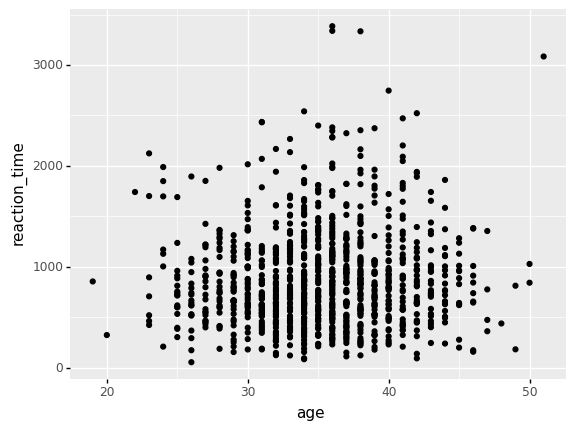

<ggplot: (8763001860473)>

In [119]:
# linearity 

(ggplot(reactionTime, aes(x = "age", y = "reaction_time")) + geom_point())

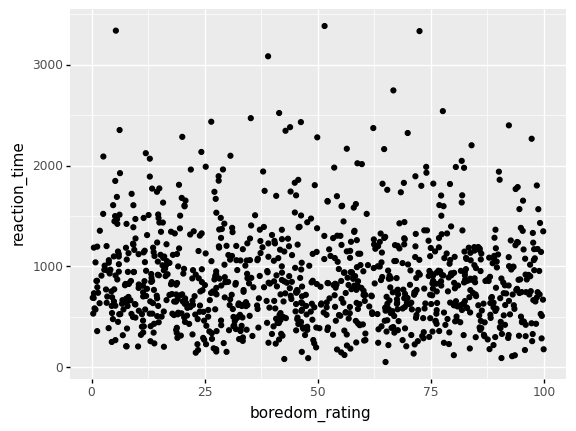

<ggplot: (8763003064402)>

In [115]:

(ggplot(reactionTime, aes(x = "boredom_rating", y = "reaction_time")) + geom_point())


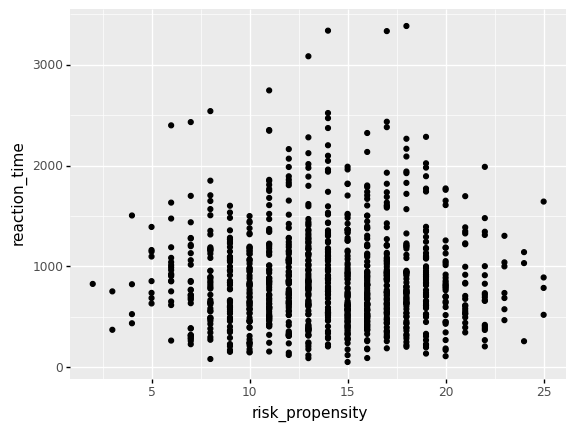

<ggplot: (8763002976919)>

In [116]:
(ggplot(reactionTime, aes(x = "risk_propensity", y = "reaction_time")) + geom_point())


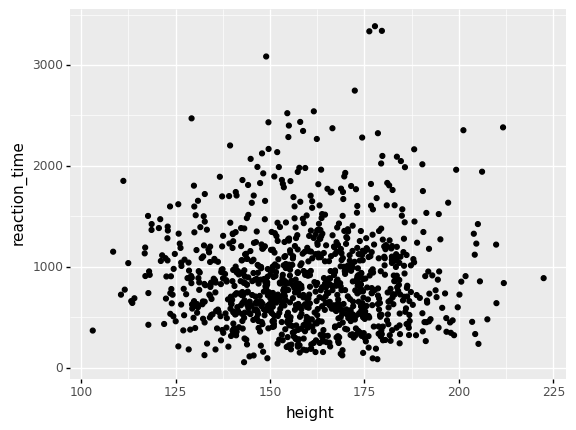

<ggplot: (8763002360869)>

In [117]:
(ggplot(reactionTime, aes(x = "height", y = "reaction_time")) + geom_point())

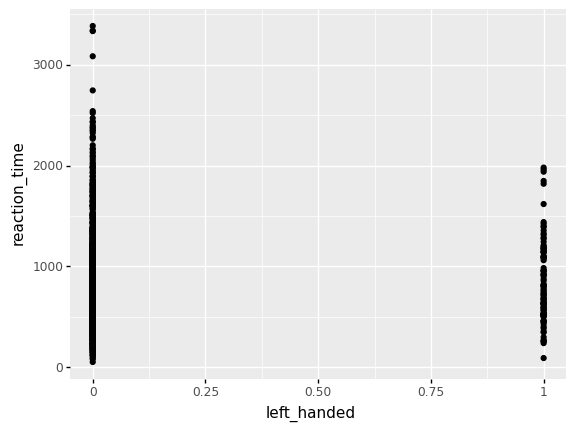

<ggplot: (8763002253008)>

In [118]:
(ggplot(reactionTime, aes(x = "left_handed", y = "reaction_time")) + geom_point())

### Answer:  
We checked the relationship between our predictor variables and the variable we are interested in by plotting them against each other. In each of these plots, we see that there is not a clear linear relationship between the predictor and the variable we are interested in. Thus the linearity assumption we make when running a linear regression is broken and another model may be a better fit for this data. There are also outliers in each of the graphs that could be affecting the predictions the model makes. 

## 1c) check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. Discuss in detail what you are checking for and what you see for this model.

In [102]:
#predictions
y_pred = lr.predict(Xz_test)

true_vs_pred = pd.DataFrame({"predicted": y_pred, "trueValue": y_test})
true_vs_pred.head()

,predicted,trueValue
515,944.114623,203.869061
508,895.349878,372.883083
763,883.825701,745.020030
232,820.825163,597.525003
866,909.817034,2471.167524


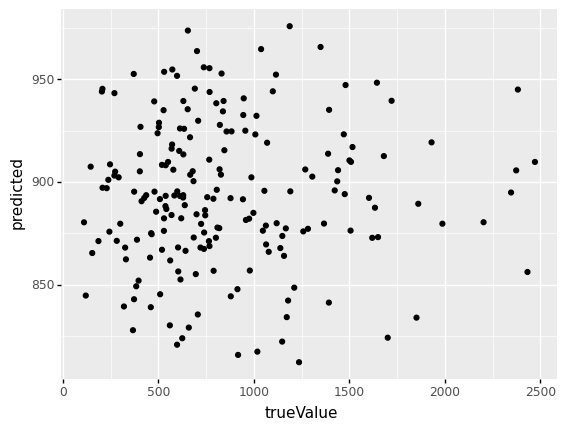

<ggplot: (8763003887791)>

In [103]:
(ggplot(true_vs_pred, aes(x = "trueValue", y = "predicted")) + geom_point())

When plotting the predicted reaction time/residuals, we are looking to see whether the predicted value and the true values are the same. If the plot showed a straight diagonal line, or the data showed a more linear relationship, then we know that our model did a pretty good job and predicted the values. However, with such a scattered plot like the one above, we see that the model did a pretty horrendous job at predicting the values and maybe too overfit to the training data.

## 1d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.

In [114]:
print(lr.score(Xz_test, y_test)) #give me the testing r2 for the testing data using the model we've built
print(lr.score(Xz_train, y_train)) #give the training r2, using the training data we used to build the model


-0.027340057909747584
0.00554078623693377


### Answer: 
To check model performance, I calculated the R-squared values for the testing and training data based on the model I had built. The values are not at all similar so we know the model did not preform well. The R-squared for the testing data is also negative, which means that the model I created does not follow the data and actually fits worse than a horizontal line (just taking the mean of the data) itself. 

## QUESTION 2
Using the data set linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/fellAsleep.csv), build a logistic regression model that predicts whether or not someone fell asleep during the experiment based on all the other variables.
<ul>
<li> a) use k-fold cross validation and make sure to z score your continuous variables
<li> b) once you have used k-fold to validate your model's performance, fit another separate logistic regression with ALL the data. Grab the coefficients, put them in a data frame, add a column to the data frame with the names of the predictors, and make a bar chart (using ggplot) showing the magnitude of each coefficient. Your coef data frame should look like this:

| PredictorName | CoefficientValue |
|---------------|-------------------|
| Predictor_1   | xx.xx             |
| Predictor_2   | xx.xx             |
| ...           | ...               |
| Predictor_N   | xx.xx             |

Where `Predictor_1`, `Predictor_2`...`Predictor_N` are the names of your predictors and `xx.xx`s are your coefficient values.

<li> c) using this graph and the table of coefs generated above, interpret/discuss all your coefficients as if you were explaining the results to a non-data scientist. Include in your explanation, the reason for presenting the coefs in log odds, odds, or probability form.
<li> d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.
</ul>



Feel free to add cells to this notebook in order to execute the code, but for parts c and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. CLEARLY mark where you are answering each question.

In [48]:
# data

fellAsleep = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/fellAsleep.csv")
fellAsleep.head()

,age,boredom_rating,risk_propensity,height,left_handed,fell_asleep
0,36,0.56,20,123.52,0,0
1,32,23.11,12,172.64,1,1
2,41,29.38,16,161.62,0,0
3,46,32.62,12,186.96,0,0
4,35,11.44,16,175.98,0,0


## 2a) use k-fold cross validation and make sure to z score your continuous variables

In [49]:
kf = KFold(n_splits = 10)

In [121]:
predictors = ["age", "boredom_rating", "risk_propensity", "height", "left_handed"]

X = fellAsleep[predictors]
y = fellAsleep["fell_asleep"]

klr = LinearRegression()
mse = []
r2 = []

In [123]:
for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    zScore = StandardScaler()
    
    X_train_cont = X_train[['age', 'boredom_rating', 'risk_propensity', 'height']]
    X_test_cont = X_test[['age', 'boredom_rating', 'risk_propensity', 'height']]

    zScore.fit(X_train_cont) 

    Xz_train = zScore.transform(X_train_cont)
    Xz_test = zScore.transform(X_test_cont) 
   
    # model
    model = klr.fit(Xz_train, y_train) # Again, ERROR: doesn't account for "lef_handed" variable 
    
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(Xz_test)))
    r2.append(r2_score(y_test, model.predict(Xz_test)))

### 2b) once you have used k-fold to validate your model's performance, fit another separate logistic regression with ALL the data. Grab the coefficients, put them in a data frame, add a column to the data frame with the names of the predictors, and make a bar chart (using ggplot) showing the magnitude of each coefficient. Your coef data frame should look like this:

| PredictorName | CoefficientValue |
|---------------|-------------------|
| Predictor_1   | xx.xx             |
| Predictor_2   | xx.xx             |
| ...           | ...               |
| Predictor_N   | xx.xx             |

#### Where Predictor_1, Predictor_2...Predictor_N are the names of your predictors and xx.xxs are your coefficient values.

In [132]:
# KFold

# create k-fold object
kflog = KFold(n_splits = 10)
kflog.split(X)

kflogr = LogisticRegression() #create model

acc = [] #create empty list to store accuracy for each fold

In [135]:
# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kflog.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]
    
    zScore = StandardScaler()
    
    X_train_cont = X_train[['age', 'boredom_rating', 'risk_propensity', 'height']]
    X_test_cont = X_test[['age', 'boredom_rating', 'risk_propensity', 'height']]

    zScore.fit(X_train_cont) 

    Xz_train = zScore.transform(X_train_cont)
    Xz_test = zScore.transform(X_test_cont) 
    
    # model
    model = kflogr.fit(Xz_train, y_train) # Again, ERROR: doesn't account for "lef_handed" variable
    
    # record accuracy
    acc.append(accuracy_score(y_test, model.predict(Xz_test)))
    
#print overall acc
print(acc)
np.mean(acc) 

[0.92, 0.9, 0.91, 0.9, 0.89, 0.93, 0.89, 0.87, 0.91, 0.91, 0.85, 0.75, 0.85, 0.83, 0.83, 0.87, 0.79, 0.85, 0.85, 0.85, 0.85, 0.75, 0.85, 0.83, 0.83, 0.87, 0.79, 0.85, 0.85, 0.85]


0.8556666666666667

In [155]:
# coefficients
coef = pd.DataFrame({ "PredictorNames": ["age", "boredom_rating", "risk_propensity", "height"] ,"CoefficientValues": np.exp(kflogr.coef_[0])})
coef

,PredictorNames,CoefficientValues
0,age,1.691084
1,boredom_rating,1.110874
2,risk_propensity,0.678171
3,height,1.005727


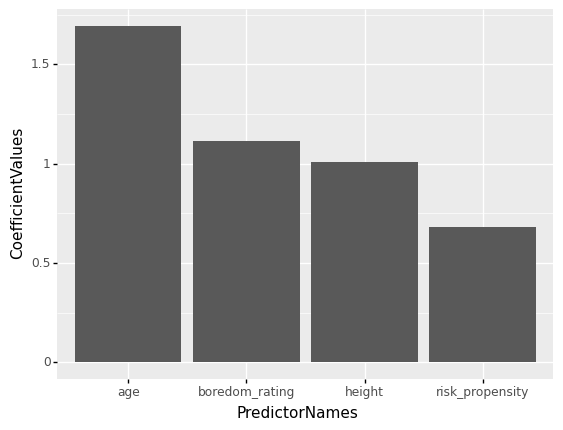

<ggplot: (8763003071278)>

In [156]:
# magnitude of coefficients

(ggplot(coef, aes(x = "PredictorNames", y = "CoefficientValues")) +
stat_summary(fun_data = "mean_sdl", geom = "bar"))

## 2c) using this graph and the table of coefs generated above, interpret/discuss all your coefficients as if you were explaining the results to a non-data scientist. Include in your explanation, the reason for presenting the coefs in log odds, odds, or probability form.

The coefficients generated by the coef function for logistic regression are in terms of log odds. However, because odds are easier to understand I converted them into odds by exponentiating the coefficients. Odds are simply the ratio of an event happening to the event not happening, and the log odds is the logarithmic function applied to this ratio. Taking the log odds of something helps normalize the data, making it more symmetrical and easier to use for more advanced statistics. Odds themselves differ from probability as probability is the ratio of an event happening to everything else. In other words, the probability is the ratio of that event occuring out of all trials. We tend to stray away from using probabilities as a one unit increase in a predictor variable does not create a constant change in the predicted probability as odds and log odds do. Log odds can be useful in turning binary variables into continuous variables. 


The coefficient of age is 1.691084 and indicates that as age increases by 1 unit (1 standard deviation since it is Z-scored), we expect the odds of falling asleep to increase by 1.691084x.

The coefficient of boredom_rating is 1.110874 and indicates that as bored_rating increases by 1 unit, we expect the odds of falling asleep to increase by 1.110874x.

The coefficient of height is 1.005727 and indicates as height increases by 1 unit, we expect the odds of falling asleep to increase by 1.0057271x. 

The coefficient of risk_propensity is 0.678171 and indicates that as risk_propensity increases by 1 unit, we expect the odds of falling asleep to decrease by 0.678171x. 



## 2d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.


For the KFold validation, we kept track of our models accuracy. We found that we had a mean accuracy score of 0.8556666666666667 meaning that across our 10 models, we averaged at 85% accuracy which means our model performed pretty well for our testing data. 